<a href="https://colab.research.google.com/github/anaguriaa/regressa/blob/main/C%C3%B3pia_de_Ol%C3%A1%2C_este_%C3%A9_o_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import csv
import numpy as np

# **BASE DE DADOS:**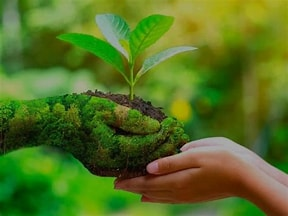
Descrição:
Este conjunto de dados fornece uma visão abrangente da receita gerada pela extração de recursos naturais nos Estados Unidos, especificamente de terras federais, águas federais e terras nativas americanas. Os dados vão de 2003 até 2023 e são organizados por ano, incluindo detalhes sobre classificação de terras, tipos de arrendamento, tipos de receita e commodities/produtos envolvidos. O conjunto de dados, gerenciado pelo Escritório de Receita de Recursos Naturais do Departamento do Interior, exclui a receita de terras privadas ou estaduais. Os dados de receita dos nativos americanos são relatados apenas em nível nacional para proteger informações privadas e confidenciais.

Este conjunto de dados serve como um recurso valioso para analisar tendências nas receitas de recursos naturais e entender as contribuições econômicas de vários tipos de extração de terras e recursos.




In [ ]:
eco = pd.read_csv("/content/calendar_year_revenue.csv")
display=(eco)
eco.head()

,Calendar Year,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Revenue Type,Mineral Lease Type,Commodity,Product,Revenue
0,2003,Federal,Onshore,Pennsylvania,Armstrong,42005.0,NaN,Royalties,Oil & Gas,Gas,Unprocessed (Wet) Gas,341.47
1,2003,Federal,Onshore,Louisiana,Natchitoches,22069.0,NaN,Other revenues,Oil & Gas,Oil & gas (pre-production),NaN,331.30
2,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Copper,Copper Concentrate,57929.02
3,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Rents,Hardrock,Hardrock,NaN,-51533.57
4,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Hardrock,Copper Concentrate,14834.41


**TROCANDO NOME DAS COLUNAS USANDO (RENAME)**

In [ ]:
eco.rename(columns={'Calendar Year':'CALENDARIODOANO'},inplace=True)
eco.rename(columns={'Land Class':' CLASSEDETERRA'}, inplace=True)
eco.rename(columns={'Land Category':'CATEGORIADETERRENO'},inplace=True)
eco.rename(columns={'State':'ESTADO'},inplace=True)
eco.rename(columns={'Country':'PAIS'},inplace=True)
eco.rename(columns={'FIPS Code':'CODIGO'},inplace=True)
eco.rename(columns={'Offshore Region':'REGIAO'},inplace=True)
eco.rename(columns={'Revenue Type':'TIPODERECEITA'},inplace=True)
eco.rename(columns={'Mineral Lease Type':'TIPODEARRENDAMENTOMINERAL'},inplace=True)
eco.rename(columns={'Commodity':'MERCADORIA'},inplace=True)
eco.rename(columns={'Product':'PRODUTO'},inplace=True)
eco.rename(columns={'Revenue':'RECEITA'},inplace=True)
eco.head()

,CALENDARIODOANO,CLASSEDETERRA,CATEGORIADETERRENO,ESTADO,County,CODIGO,REGIAO,TIPODERECEITA,TIPODEARRENDAMENTOMINERAL,MERCADORIA,PRODUTO,RECEITA
0,2003,Federal,Onshore,Pennsylvania,Armstrong,42005.0,NaN,Royalties,Oil & Gas,Gas,Unprocessed (Wet) Gas,341.47
1,2003,Federal,Onshore,Louisiana,Natchitoches,22069.0,NaN,Other revenues,Oil & Gas,Oil & gas (pre-production),NaN,331.30
2,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Copper,Copper Concentrate,57929.02
3,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Rents,Hardrock,Hardrock,NaN,-51533.57
4,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Hardrock,Copper Concentrate,14834.41


Python Pandas **DataFrame.isull()** função detecta o valor em falta de um objecto e a função DataFrame.notnull() detecta o valor em falta de um objecto. Ambas as funções retornam booleano escalar para entrada escalar.

In [ ]:
eco.isnull().sum()

,0
CALENDARIODOANO,0
CLASSEDETERRA,0
CATEGORIADETERRENO,0
ESTADO,1955
County,1955
CODIGO,1955
REGIAO,47480
TIPODERECEITA,0
TIPODEARRENDAMENTOMINERAL,87
MERCADORIA,0


**ALTERANDO VALORES NaN**

In [ ]:
eco.fillna(0, inplace=True)

print(eco)

       CALENDARIODOANO  CLASSEDETERRA CATEGORIADETERRENO        ESTADO  \
0                 2003        Federal            Onshore  Pennsylvania   
1                 2003        Federal            Onshore     Louisiana   
2                 2003        Federal            Onshore      Missouri   
3                 2003        Federal            Onshore      Missouri   
4                 2003        Federal            Onshore      Missouri   
...                ...            ...                ...           ...   
48408             2023        Federal            Onshore       Montana   
48409             2023        Federal            Onshore        Kansas   
48410             2023        Federal            Onshore  North Dakota   
48411             2023        Federal            Onshore      Oklahoma   
48412             2023        Federal            Onshore  Pennsylvania   

             County   CODIGO REGIAO   TIPODERECEITA TIPODEARRENDAMENTOMINERAL  \
0         Armstrong  42005.0  

A função **shape** em Python é uma ferramenta útil para manipular a forma ou dimensão de um array. Para obter a forma de um array em Python, use o atributo “shape” no objeto array. Por exemplo, você pode obter o tamanho de cada dimensão de um array chamando array.shape, que retorna uma tupla.

In [ ]:
contagem_linhas = eco.shape[0]
print(contagem_linhas)

48413


# **Statsmodels** é destinada à estimação de modelos estatísticos, além de também possibilitar a execução de testes de inferência estatística.

**O que é o Teste de Lilliefors?**
O Teste de Lilliefors é um método estatístico utilizado para verificar a normalidade de uma amostra de dados. Ele é uma adaptação do teste de Kolmogorov-Smirnov, que é tradicionalmente usado para comparar uma amostra com uma distribuição teórica, mas que assume que os parâmetros da distribuição são conhecidos. O Teste de Lilliefors, por outro lado, é especialmente útil quando os parâmetros da distribuição normal, como a média e o desvio padrão, não são conhecidos e precisam ser estimados a partir dos dados da amostra.

HO = DISTRIBUIÇÃO NORMAL p > 0,05
HO = DISTRIBUIÇÃO NORMAL!= p <= 0,05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
valores, p = statsmodels.stats.diagnostic.lilliefors(eco.RECEITA, dist = 'norm')
print('Estatistica do teste:{}'.format(valores))
print('p-valor:{}'.format(p))

Estatistica do teste:0.47066888013590186
p-valor:0.0009999999999998899


# **ANÁLISE DE OUTLIERS**

BOXPLOT:
 Trata-se de um gráfico cujo nome em português é “diagrama de caixas,” mas que é muito mais conhecido pelo seu nome em inglês: boxplot.

 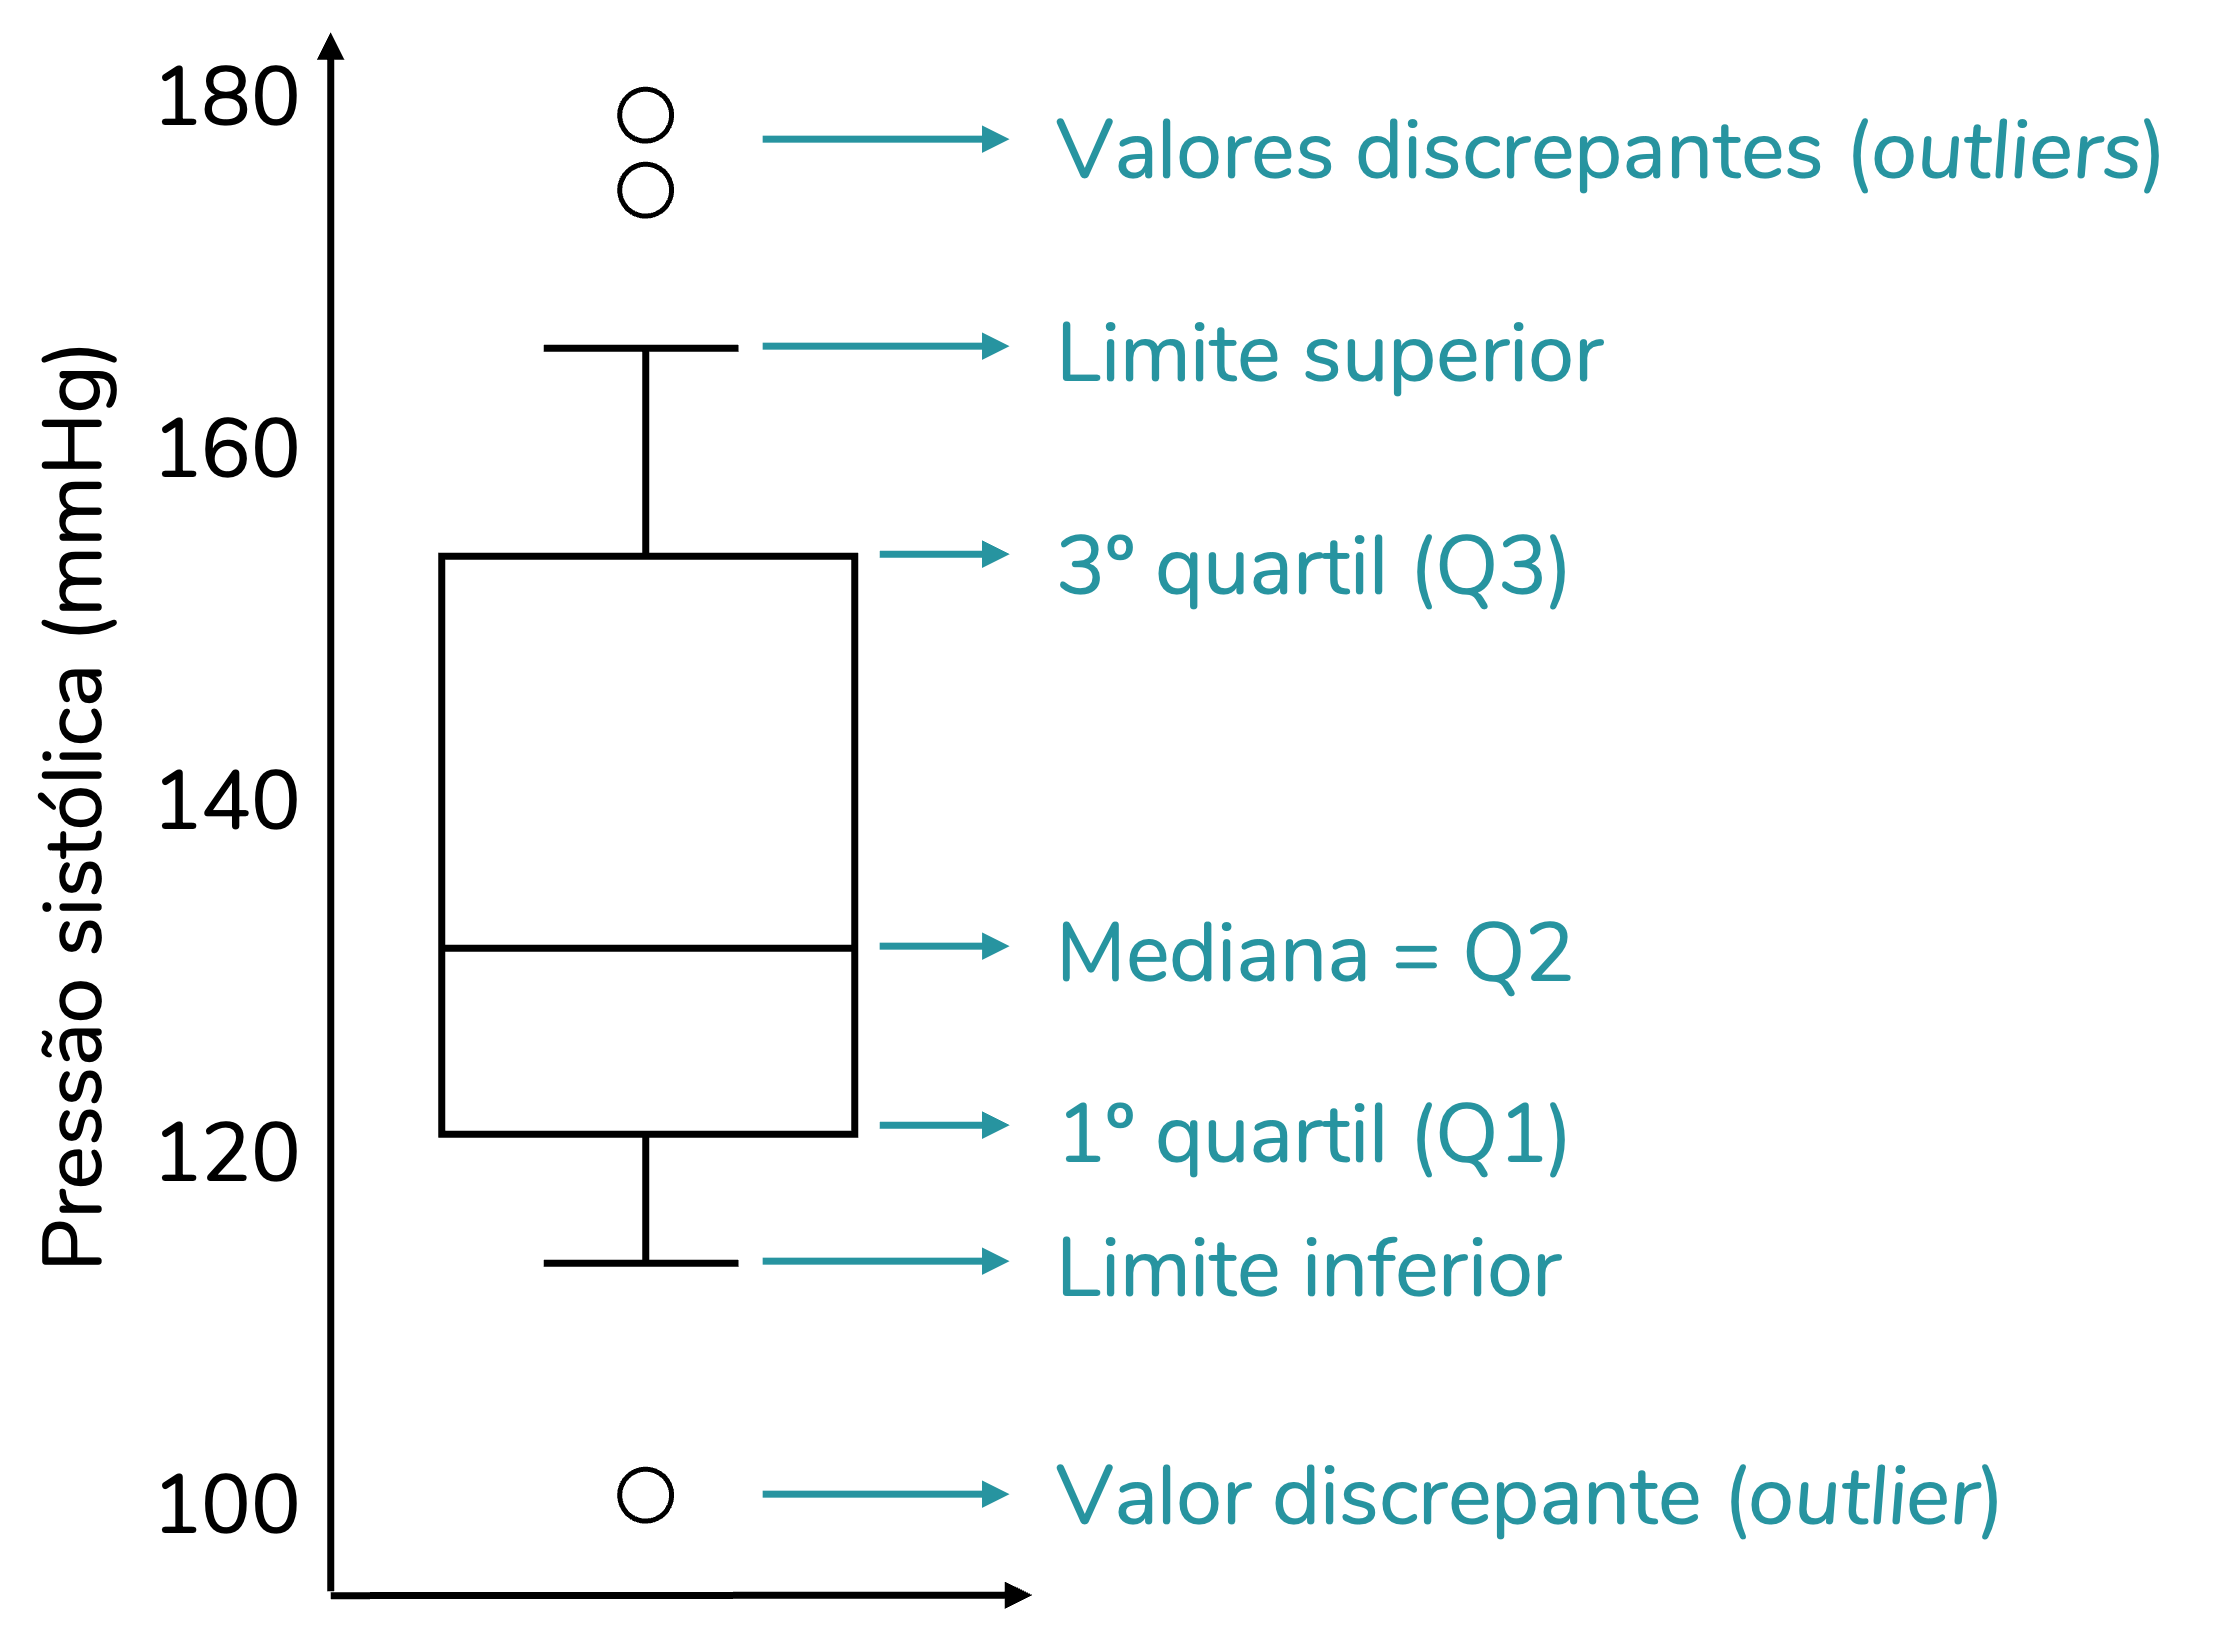

In [ ]:
import plotly.express as px

In [ ]:

boxplot = px.box(eco, y="RECEITA")
boxplot.show()

In [ ]:
boxplot = px.box(eco, y="PRODUTO")
boxplot.show()

In [ ]:
eco.head(3)

,CALENDARIODOANO,CLASSEDETERRA,CATEGORIADETERRENO,ESTADO,County,CODIGO,REGIAO,TIPODERECEITA,TIPODEARRENDAMENTOMINERAL,MERCADORIA,PRODUTO,RECEITA
0,2003,Federal,Onshore,Pennsylvania,Armstrong,42005.0,0,Royalties,Oil & Gas,Gas,Unprocessed (Wet) Gas,341.47
1,2003,Federal,Onshore,Louisiana,Natchitoches,22069.0,0,Other revenues,Oil & Gas,Oil & gas (pre-production),0,331.30
2,2003,Federal,Onshore,Missouri,Iron,29093.0,0,Royalties,Hardrock,Copper,Copper Concentrate,57929.02


ANÁLISE DE CORRELAÇÃO **LINEAR**

In [ ]:
import matplotlib.pyplot as plt


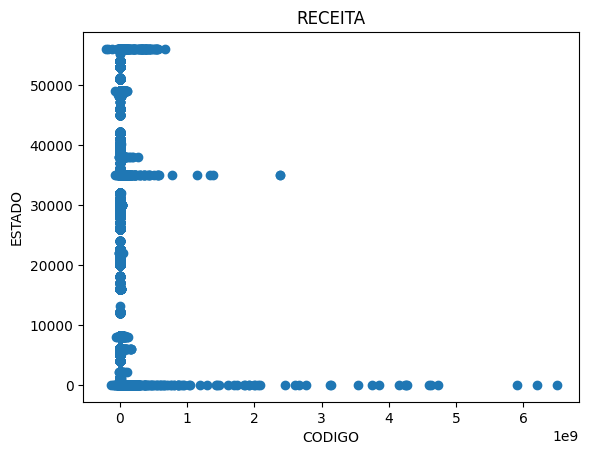

In [ ]:
plt.scatter(eco.RECEITA,eco.CODIGO)
plt.title("RECEITA")
plt.xlabel("CODIGO")
plt.ylabel("ESTADO")
plt.grid(False)
plt.show()

ANÁLISE DA NORMALIDADE
GRÁFICO Q-Q PLOT

In [ ]:
import seaborn as sns
import scipy.stats as stats

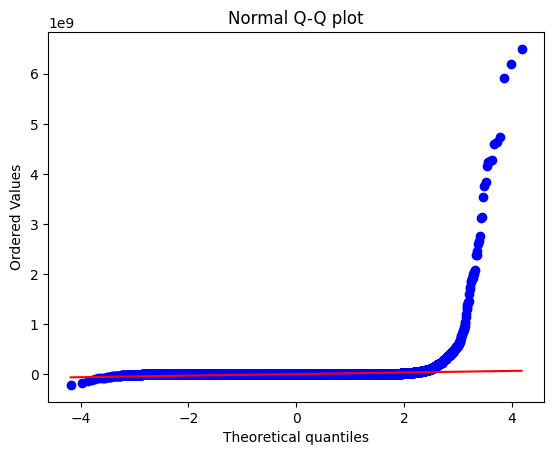

In [ ]:
stats.probplot(eco['RECEITA'],dist='norm',plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

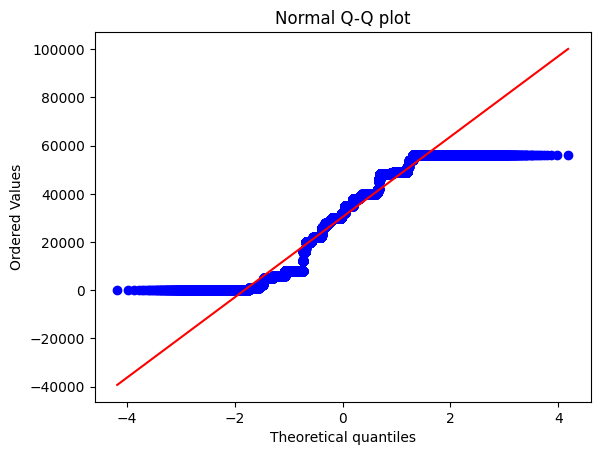

In [ ]:
stats.probplot(eco['CODIGO'], dist='norm',plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
coef, p=stats.pearsonr(eco.RECEITA, eco.CODIGO)
print('cOEFICIENTE DE CORRELAÇÃO:{}'.format(coef))
print('p-valor:{}'.format(p))

cOEFICIENTE DE CORRELAÇÃO:-0.048384346515447534
p-valor:1.7075160155835403e-26


In [ ]:
coef, p=stats.spearmanr(eco.RECEITA, eco.CODIGO)
print('COEFICIENTE DE CORRELAÇÃO:{}'.format(coef))
print('p-valor:{}'.format(p))

COEFICIENTE DE CORRELAÇÃO:0.0970546911255269
p-valor:1.202947548593837e-101


# **MODELO DE REGRESSAO LINEAR**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [ ]:
regressao= smf.ols('RECEITA ~ CODIGO',data =eco).fit()

In [44]:
residuos = regressao.resid
residuos

,0
0,-2.055913e+06
1,-7.406541e+06
2,-5.463773e+06
3,-5.573236e+06
4,-5.506868e+06
...,...
48408,-5.255434e+06
48409,-7.908087e+06
48410,-3.046487e+06
48411,-2.464765e+06


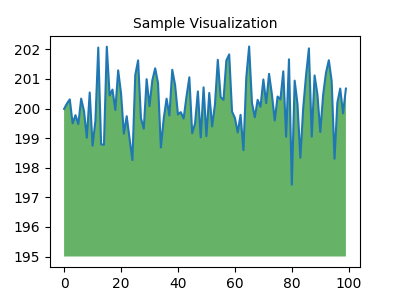

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

É possível importar para os notebooks do Colab os dados da sua conta do Google Drive, como planilhas. Também é possível importar do GitHub e de muitas outras fontes. Para saber mais sobre como importar dados e como o Colab pode ser usado para a ciência de dados, consulte o link abaixo em <a href="#working-with-data">Como trabalhar com dados</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

Com o Colab, é possível importar um conjunto de dados de imagem, treinar um classificador de imagens dentro dele e avaliar o modelo, tudo com apenas <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">algumas linhas de código</a>. Os notebooks do Colab executam código dos servidores em nuvem do Google. Isso significa que você pode tirar proveito da potência de hardware do Google, como <a href="#using-accelerated-hardware">GPUs e TPUs</a>, independentemente da potência da sua máquina. Você só precisa de um navegador.

O Colab é usado amplamente pela comunidade de machine learning, para aplicações como:
- Começar a usar o TensorFlow
- Desenvolvimento e treinamento de redes neurais
- Experimentos com TPUs
- Divulgação de pesquisas em IA
- Criação de tutoriais

Para acessar notebooks do Colab que demonstram aplicações de machine learning, consulte os <a href="#machine-learning-examples">exemplos de machine learning</a> abaixo.

<div class="markdown-google-sans">

## Mais recursos

### Como trabalhar com Notebooks no Colab

</div>

- [Visão geral do Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guia sobre Markdown](/notebooks/markdown_guide.ipynb)
- [Importar bibliotecas e instalar dependências](/notebooks/snippets/importing_libraries.ipynb)
- [Salvar e carregar notebooks no GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Formulários interativos](/notebooks/forms.ipynb)
- [Widgets interativos](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Como trabalhar com dados
</div>

- [Carregar dados: Drive, Planilhas e Google Cloud Storage](/notebooks/io.ipynb)
- [Gráficos: visualizar dados](/notebooks/charts.ipynb)
- [Começar a usar o BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Curso intensivo de machine learning

<div>

Estes são alguns notebooks do curso on-line do Google sobre machine learning. Acesse o <a href="https://developers.google.com/machine-learning/crash-course/">site do curso completo</a> para saber mais.
- [Introdução ao Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Regressão linear com tf.keras e uso de dados sintéticos](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Usar hardware acelerado
</div>

- [TensorFlow com GPUs](/notebooks/gpu.ipynb)
- [TensorFlow com TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Exemplos em destaque

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: use o kit de ferramentas para IA conversacional do Nvidia NeMo para trocar uma voz em um fragmento de áudio por uma gerada por computador.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Treinar novamente um classificador de imagens</a>: crie um modelo do Keras com base em um classificador de imagens pré-treinado para distinguir flores.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Classificação de texto</a>: classifique avaliações de filmes do IMDB como <em>positivas</em> ou <em>negativas</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Transferência de estilo</a>: use o aprendizado profundo para transferir o estilo entre imagens.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Perguntas e respostas sobre o codificador de frases universais multilíngue</a>: use um modelo de machine learning para responder a perguntas do conjunto de dados SQuAD.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Interpolação de vídeo</a>: preveja o que aconteceu em um vídeo entre o primeiro e o último frames.
